In [22]:
# packages
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import os
import shutil
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import string  

In [23]:
# set directories
inputpath=r'C:/Users/buca4591/Desktop/2nd year/applied/busra_canci/task3/analysis/input'
outputpath=r'C:/Users/buca4591/Desktop/2nd year/applied/busra_canci/task3/analysis/output'

In [24]:
# import the data
by_country = pd.read_stata(inputpath+'/by_country.dta')
t_by_country = pd.read_stata(inputpath+'/t_by_country.dta')
by_country_scaled = pd.read_stata(inputpath+'/by_country_scaled.dta')
t_by_country_scaled = pd.read_stata(inputpath+'/t_by_country_scaled.dta')
print(t_by_country)

   index     _12_0     _31_0     _32_0     _36_0     _51_0     _76_0  \
0    V45  1.484167  1.333333  2.511650  2.571429  1.806364  2.553836   
1    V46 -4.000000  1.150699  1.791262  1.771158  1.270000  1.386272   
2    V47  1.591667  1.917166  2.225243  2.513879  2.034545  2.107672   
3    V48  1.514167  1.914172  1.480583  1.701422  1.838182  1.314266   
4    V49  1.053333  1.600798  1.884466  2.080569  1.574545  1.609690   
5    V50  1.717500  2.378244 -4.000000  2.904536  2.312727  2.251009   
6    V51  1.681667  2.090818  2.724272  2.863913  2.143636  2.673620   
7    V52  2.488333  2.758483  3.029126  3.362221  2.985455  3.150067   
8    V53  1.936667  2.007984  2.892233  3.132024  2.257273  2.804845   
9    V54  1.643333  1.997006  2.199029  2.125254  2.312727  2.462315   
10   V55  6.401667  7.273453  7.192233  7.687204  6.079091  7.559219   
11   V56  5.101667  5.365269  5.232039  6.377793  4.817273  4.710633   
12   V95  2.035000  5.902196  3.990291  5.058903  2.895455  4.06

In [25]:
# fix the datasets
by_country_scaled=by_country_scaled.iloc[:,1:]
t_by_country_scaled=t_by_country_scaled.iloc[:,1:]
by_country=by_country.iloc[:,1:]
t_by_country=t_by_country.iloc[:,1:]

PRINCIPAL COMPONENT ANALYSIS

In [26]:
by_country_scaled = by_country_scaled.dropna()

pca = PCA(n_components=55)
pca.fit(by_country_scaled)
pd.DataFrame(pca.components_,columns = by_country.columns,index = [list(range(1, 56))]).T
pca_components = pca.transform(by_country_scaled)
print(pca_components.shape)
df = pd.DataFrame(pca_components,columns = [list(range(1, 56))])
df.head()

(60, 55)


,1,2,3,4,5,6,7,8,9,10,...,46,47,48,49,50,51,52,53,54,55
0,4.251228,-1.718208,-3.413040,0.635826,-1.278851,-0.853307,-1.053122,-1.220629,-0.567948,-1.211885,...,-0.156420,0.170322,-0.031886,-0.003605,-0.027593,0.021960,-0.004580,-0.001338,0.024308,0.021283
1,-1.010941,-2.438189,0.633026,1.376631,0.801264,0.697751,3.255582,-1.976263,-0.330082,-0.230009,...,-0.032015,0.056344,0.049031,-0.040033,-0.025116,-0.029574,-0.003397,0.017404,-0.028448,-0.015389
2,-3.673556,0.897437,0.100310,-0.410283,-0.696995,1.075058,-1.086534,4.055881,-1.111620,-2.506415,...,0.060816,0.028284,-0.002530,0.006558,0.008230,0.015923,0.000484,0.003493,0.007769,0.008026
3,-4.105935,3.340290,2.236084,-0.163467,-0.519239,-0.043090,-1.359801,-2.521263,-0.184314,0.371844,...,-0.048589,0.247649,0.044766,-0.070193,-0.039482,0.066993,-0.018754,0.054675,-0.005306,0.054684
4,-0.147467,-1.096198,-0.300888,-0.668369,1.236979,0.765142,-1.498763,0.792278,-1.255196,1.884761,...,-0.026403,-0.096824,0.039629,0.056652,0.013813,0.044371,-0.023616,0.002654,0.017930,0.036670


In [27]:
# see the explained variance
pca.explained_variance_

array([1.33027008e+01, 8.83138250e+00, 5.41628870e+00, 4.27255151e+00,
       3.99807092e+00, 3.37776981e+00, 2.92739148e+00, 1.95421050e+00,
       1.56522028e+00, 1.22141992e+00, 1.14319885e+00, 9.71434225e-01,
       9.23413831e-01, 6.99209428e-01, 6.61873771e-01, 6.19220218e-01,
       5.36928278e-01, 4.96669775e-01, 4.36668482e-01, 4.03448434e-01,
       3.62469496e-01, 3.60200853e-01, 2.80752603e-01, 2.66183632e-01,
       2.39379791e-01, 2.08298418e-01, 1.90305296e-01, 1.45646810e-01,
       1.40428982e-01, 1.34313547e-01, 1.27917317e-01, 1.02496875e-01,
       8.98264348e-02, 7.47033699e-02, 6.91125204e-02, 6.45813560e-02,
       5.73842162e-02, 4.80913566e-02, 4.49628826e-02, 3.15059300e-02,
       2.87903514e-02, 2.53551157e-02, 2.47883679e-02, 2.00068242e-02,
       1.18600286e-02, 9.24835723e-03, 8.55199633e-03, 6.91873155e-03,
       5.99560583e-03, 4.09548963e-03, 1.94985361e-03, 1.51810196e-03,
       1.15390747e-03, 6.14324358e-04, 5.00253721e-04])

In [28]:
# see the explained variance ratio
pca.explained_variance_ratio_

array([2.33589092e-01, 1.55074871e-01, 9.51074504e-02, 7.50239700e-02,
       7.02042216e-02, 5.93120295e-02, 5.14036005e-02, 3.43150057e-02,
       2.74845227e-02, 2.14475522e-02, 2.00740274e-02, 1.70579224e-02,
       1.62147071e-02, 1.22777846e-02, 1.16221882e-02, 1.08732122e-02,
       9.42820488e-03, 8.72128473e-03, 7.66769060e-03, 7.08436239e-03,
       6.36479175e-03, 6.32495546e-03, 4.92988202e-03, 4.67405783e-03,
       4.20339513e-03, 3.65762104e-03, 3.34167037e-03, 2.55748862e-03,
       2.46586605e-03, 2.35848192e-03, 2.24616716e-03, 1.79979631e-03,
       1.57730942e-03, 1.31175560e-03, 1.21358295e-03, 1.13401786e-03,
       1.00763951e-03, 8.44461321e-04, 7.89526807e-04, 5.53229128e-04,
       5.05544861e-04, 4.45223759e-04, 4.35271937e-04, 3.51310305e-04,
       2.08256454e-04, 1.62396749e-04, 1.50168983e-04, 1.21489631e-04,
       1.05279983e-04, 7.19148477e-05, 3.42385010e-05, 2.66571475e-05,
       2.02620657e-05, 1.07872432e-05, 8.78421713e-06])

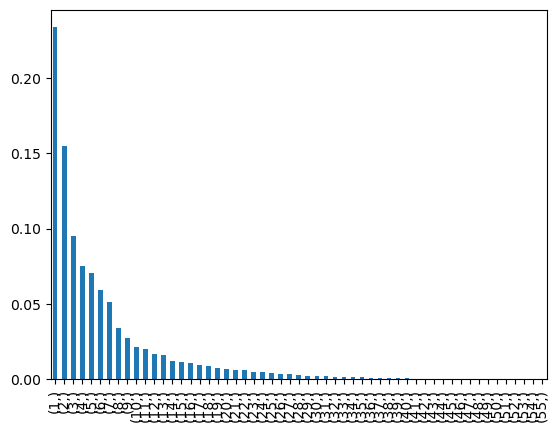

In [29]:
# graph of the explained variance ratio
pd.Series(pca.explained_variance_ratio_,index = [list(range(1, 56))]).plot.bar()
plt.savefig(outputpath+'/pca1.png')

            a          b         c         d         e         f         g  \
0    4.251228  -1.718208 -3.413040  0.635826 -1.278851 -0.853307 -1.053122   
1   -1.010941  -2.438189  0.633026  1.376631  0.801264  0.697751  3.255582   
2   -3.673556   0.897437  0.100310 -0.410283 -0.696995  1.075058 -1.086534   
3   -4.105935   3.340290  2.236084 -0.163467 -0.519239 -0.043090 -1.359801   
4   -0.147467  -1.096198 -0.300888 -0.668369  1.236979  0.765142 -1.498763   
5   -3.292549  -0.288192  0.492651 -0.205611 -1.447315 -0.381497 -1.787908   
6   -1.420703  -0.672382 -0.912118 -0.439185 -0.058579  0.788290  0.865123   
7   -2.608999   0.326286  0.310176 -0.722526 -0.289607  1.379459  0.343149   
8    7.944580   4.329984 -0.964906 -2.929708 -1.687455 -0.955368  2.000835   
9   -0.003414   1.769829  1.442686 -1.844797 -0.164685 -0.407868 -0.779199   
10  -2.742710  -0.693042  0.559503  0.151279 -1.787908 -2.140406 -1.367282   
11  -1.614183   1.242729  1.451355 -1.459296 -0.089771  0.434749

IndexError: list index out of range

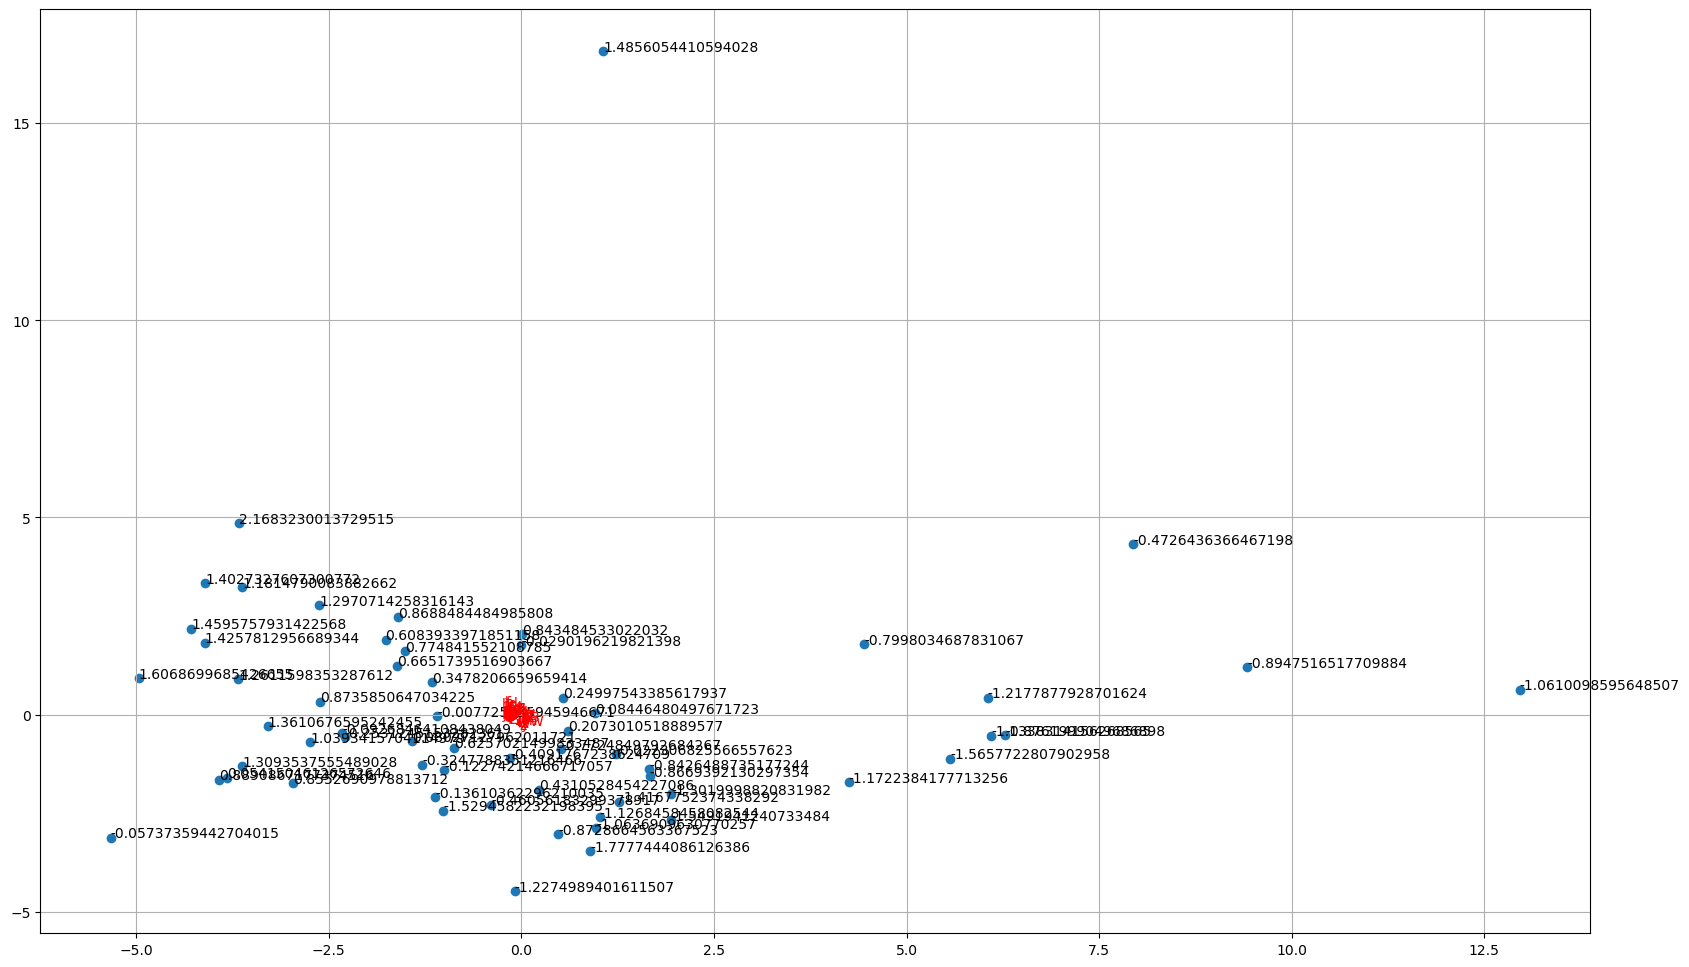

In [30]:
#### even though I tried many things I could not create a proper graph for PCA analysis. 
# If you help me with this kind of graphs in python, it would be great :) 
df.columns = list(string.ascii_letters) + list(range(1, 4))
print(df)

fig, ax = plt.subplots(figsize = (20,12))
ax.grid(True)
ax.scatter(df['a'],df['b'])

names = list(by_country_scaled.iloc[:,0])

for i, txt in enumerate(names):
    ax.annotate(txt, (df['a'][i], df['b'][i]))

xvector = pca.components_[0] 
yvector = pca.components_[1]

xs = pca.transform(by_country_scaled)[:,0] 
ys = pca.transform(by_country_scaled)[:,1]

X = df.iloc[:,1:]
list(X.columns)

for i in range(len(xvector)):
    plt.arrow(0, 0, xvector[i], yvector[i],
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*1.2, yvector[i]*1.2,
             list(X.columns.values)[i], color='r')

PCA W\O NORMALIZATION

In [32]:
by_country = by_country.dropna()

pca = PCA(n_components=55)
pca.fit(by_country)
pd.DataFrame(pca.components_,columns = by_country.columns,index = [list(range(1, 56))]).T
pca_components = pca.transform(by_country)
print(pca_components.shape)
df = pd.DataFrame(pca_components,columns = [list(range(1, 56))])
df.head()

(60, 55)


,1,2,3,4,5,6,7,8,9,10,...,46,47,48,49,50,51,52,53,54,55
0,2.657161,-0.012217,-2.816856,1.217019,3.696805,2.450832,0.700601,-1.728719,-1.105880,0.294732,...,0.048180,-0.104009,-0.040999,-0.038863,-0.013662,-0.000396,-0.004332,0.020453,-0.004964,-0.011645
1,-2.277670,-1.630898,0.338733,-0.527558,-0.499128,-0.352844,1.259562,0.736720,-1.453558,-0.074002,...,0.002342,-0.004360,0.005101,0.003409,-0.013126,0.013498,0.004877,-0.028109,-0.005838,0.010593
2,-1.198490,0.975910,-0.339784,0.553575,-0.616994,-0.694499,-0.623038,0.881181,0.393627,3.452858,...,0.020411,0.017181,-0.012646,0.003160,-0.006819,-0.001007,0.002913,0.007954,-0.001395,-0.004136
3,-2.594320,2.095488,0.113545,-0.342632,-2.404927,1.279318,-0.879098,-1.325050,0.306277,-0.328954,...,0.042381,-0.093615,0.009171,0.001747,-0.074497,0.028593,0.047910,0.023583,-0.011224,-0.034293
4,0.653835,-0.194426,-0.503056,1.156014,0.013366,-0.906522,-1.052119,0.183494,-0.014705,0.145846,...,-0.033421,0.063046,-0.013817,0.007299,0.018255,-0.008498,0.020978,0.015057,-0.000699,-0.024930


In [33]:
# see the explained variance
pca.explained_variance_

array([1.18445227e+01, 7.88937653e+00, 4.36107875e+00, 3.79925979e+00,
       3.63029448e+00, 2.76322848e+00, 1.96483743e+00, 1.81725883e+00,
       1.41463323e+00, 1.14395710e+00, 8.84026808e-01, 8.11901004e-01,
       7.57585933e-01, 5.59407390e-01, 5.16891303e-01, 3.76330918e-01,
       3.40023461e-01, 2.63863551e-01, 2.52324330e-01, 2.01640525e-01,
       1.61545767e-01, 1.43072954e-01, 1.34688345e-01, 1.03673555e-01,
       9.42448390e-02, 8.14587554e-02, 7.61611657e-02, 6.48451913e-02,
       5.58578424e-02, 4.30657737e-02, 3.36414507e-02, 3.13252018e-02,
       2.91035283e-02, 2.59775455e-02, 2.15470199e-02, 1.75567347e-02,
       1.59914943e-02, 1.35198567e-02, 1.27392792e-02, 1.01195936e-02,
       8.09195740e-03, 6.40188489e-03, 5.41018643e-03, 5.24596744e-03,
       4.60264109e-03, 3.60271671e-03, 2.53541548e-03, 2.16056618e-03,
       1.55613574e-03, 1.16616168e-03, 7.10921544e-04, 6.40422459e-04,
       5.27175999e-04, 2.46229745e-04, 1.71727918e-04])

In [34]:
# see the explained variance ratio
pca.explained_variance_ratio_

array([2.53057331e-01, 1.68555932e-01, 9.31741171e-02, 8.11708976e-02,
       7.75609664e-02, 5.90361672e-02, 4.19786027e-02, 3.88255971e-02,
       3.02235318e-02, 2.44405567e-02, 1.88871658e-02, 1.73462034e-02,
       1.61857661e-02, 1.19516965e-02, 1.10433435e-02, 8.04028155e-03,
       7.26457547e-03, 5.63742478e-03, 5.39089020e-03, 4.30803453e-03,
       3.45141306e-03, 3.05674283e-03, 2.87760628e-03, 2.21497764e-03,
       2.01353384e-03, 1.74036014e-03, 1.62717753e-03, 1.38541260e-03,
       1.19339857e-03, 9.20096991e-04, 7.18747045e-04, 6.69260563e-04,
       6.21794677e-04, 5.55008292e-04, 4.60350448e-04, 3.75098307e-04,
       3.41657064e-04, 2.88850714e-04, 2.72173735e-04, 2.16204351e-04,
       1.72884057e-04, 1.36775786e-04, 1.15588223e-04, 1.12079697e-04,
       9.83350781e-05, 7.69717696e-05, 5.41689596e-05, 4.61603327e-05,
       3.32467222e-05, 2.49149560e-05, 1.51887849e-05, 1.36825773e-05,
       1.12630753e-05, 5.26067984e-06, 3.66895397e-06])

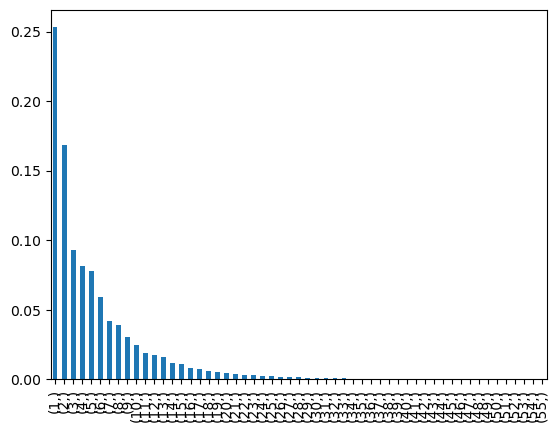

In [35]:
# graph of the explained variance ratio
pd.Series(pca.explained_variance_ratio_,index = [list(range(1, 56))]).plot.bar()
plt.savefig(outputpath+'/pca2.png')

HIERARCHICAL CLUSTERING ANALYSIS

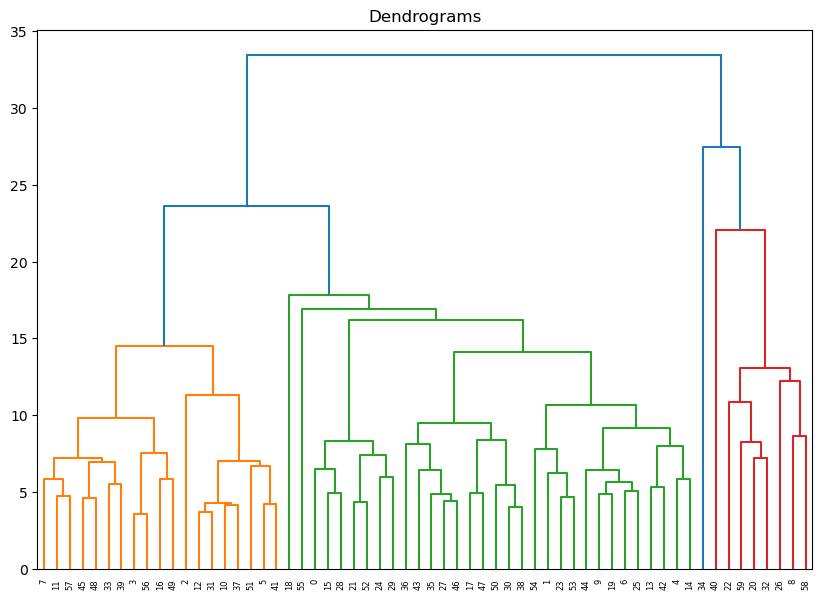

In [36]:
# dendrogram for countries
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(by_country_scaled, method='ward'))
plt.savefig(outputpath+'/dendrogram1.png')

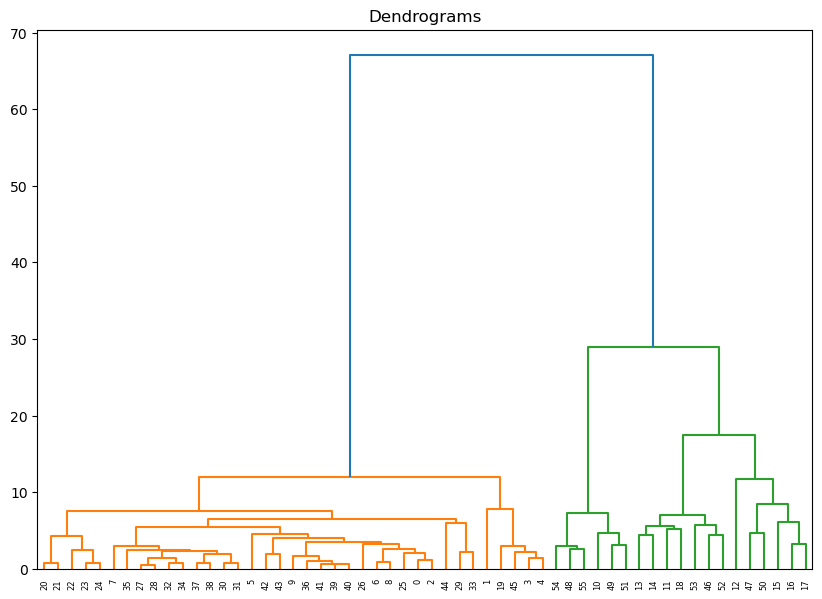

In [37]:
# dendrogram for questions
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(t_by_country_scaled, method='ward'))
plt.savefig(outputpath+'/dendrogram2.png')